In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import sklearn as skl

#  Import and read the heart_desease_data.csv.
file_path = "Resources/processed_cleveland.csv"
processed_cleveland_df = pd.read_csv(file_path, encoding="ISO-8859-1")
processed_cleveland_df.head()

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
processed_cleveland_df

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':' Chest Pain (cp)'}>],
       [<AxesSubplot:title={'center':'Resting Blood Pressure (trestbps)'}>,
        <AxesSubplot:title={'center':'Serum Cholestoral (Chol)'}>,
        <AxesSubplot:title={'center':'Fasting Blood Sugar (fbs)'}>],
       [<AxesSubplot:title={'center':'Resting Electrocardiographic Results (restecg)'}>,
        <AxesSubplot:title={'center':'Maximum Heart Rate Achieved (thalach)'}>,
        <AxesSubplot:title={'center':'Exercise Induced Angina (exang)'}>],
       [<AxesSubplot:title={'center':'ST depression induced by exercise relative to rest (oldpeak)'}>,
        <AxesSubplot:title={'center':'the slope of the peak exercise ST segment (slope)'}>,
        <AxesSubplot:title={'center':'diagnosis of heart disease (num)'}>]],
      dtype=object)

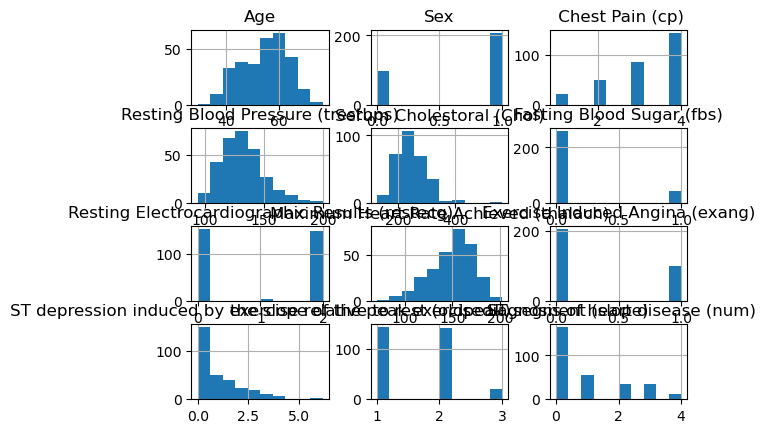

In [2]:
processed_cleveland_df.hist()

In [6]:
#  Import and read the heart_desease_data.csv.
file_path = "Resources/processed_cleveland.csv"
processed_va_df = pd.read_csv(file_path, encoding="ISO-8859-1")
processed_va_df.head()

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [7]:
processed_va_df

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [10]:
#  Import and read the heart_desease_data.csv.
file_path = "Resources/reprocessed_hungarian.csv"
reprocessed_hungarian_df = pd.read_csv(file_path, encoding="ISO-8859-1")
reprocessed_hungarian_df.head()

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0


In [11]:
reprocessed_hungarian_df

,Age,Sex,Chest Pain (cp),Resting Blood Pressure (trestbps),Serum Cholestoral (Chol),Fasting Blood Sugar (fbs),Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression induced by exercise relative to rest (oldpeak),the slope of the peak exercise ST segment (slope),number of major vessels (ca),thal,diagnosis of heart disease (num)
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [24]:
heart_2020_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [8]:
processed_cleveland_df.dtypes

Age                                                               int64
Sex                                                               int64
 Chest Pain (cp)                                                  int64
Resting Blood Pressure (trestbps)                                 int64
Serum Cholestoral (Chol)                                          int64
Fasting Blood Sugar (fbs)                                         int64
Resting Electrocardiographic Results (restecg)                    int64
Maximum Heart Rate Achieved (thalach)                             int64
Exercise Induced Angina (exang)                                   int64
ST depression induced by exercise relative to rest (oldpeak)    float64
the slope of the peak exercise ST segment (slope)                 int64
number of major vessels (ca)                                     object
thal                                                             object
diagnosis of heart disease (num)                                

In [9]:
processed_va_df.dtypes

Age                                                               int64
Sex                                                               int64
 Chest Pain (cp)                                                  int64
Resting Blood Pressure (trestbps)                                 int64
Serum Cholestoral (Chol)                                          int64
Fasting Blood Sugar (fbs)                                         int64
Resting Electrocardiographic Results (restecg)                    int64
Maximum Heart Rate Achieved (thalach)                             int64
Exercise Induced Angina (exang)                                   int64
ST depression induced by exercise relative to rest (oldpeak)    float64
the slope of the peak exercise ST segment (slope)                 int64
number of major vessels (ca)                                     object
thal                                                             object
diagnosis of heart disease (num)                                

In [12]:
reprocessed_hungarian_df.dtypes

Age                                                               int64
Sex                                                               int64
 Chest Pain (cp)                                                  int64
Resting Blood Pressure (trestbps)                                 int64
Serum Cholestoral (Chol)                                          int64
Fasting Blood Sugar (fbs)                                         int64
Resting Electrocardiographic Results (restecg)                    int64
Maximum Heart Rate Achieved (thalach)                             int64
Exercise Induced Angina (exang)                                   int64
ST depression induced by exercise relative to rest (oldpeak)    float64
the slope of the peak exercise ST segment (slope)                 int64
number of major vessels (ca)                                      int64
thal                                                              int64
diagnosis of heart disease (num)                                

In [13]:
# Find null values
for column in processed_cleveland_df.columns:
    print(f"Column {column} has {processed_cleveland_df[column].isnull().sum()}null values")

Column Age has 0null values
Column Sex has 0null values
Column  Chest Pain (cp) has 0null values
Column Resting Blood Pressure (trestbps) has 0null values
Column Serum Cholestoral (Chol) has 0null values
Column Fasting Blood Sugar (fbs) has 0null values
Column Resting Electrocardiographic Results (restecg) has 0null values
Column Maximum Heart Rate Achieved (thalach) has 0null values
Column Exercise Induced Angina (exang) has 0null values
Column ST depression induced by exercise relative to rest (oldpeak) has 0null values
Column the slope of the peak exercise ST segment (slope) has 0null values
Column number of major vessels (ca) has 0null values
Column thal has 0null values
Column diagnosis of heart disease (num) has 0null values


In [14]:
# Find null values
for column in processed_va_df.columns:
    print(f"Column {column} has {processed_va_df[column].isnull().sum()}null values")

Column Age has 0null values
Column Sex has 0null values
Column  Chest Pain (cp) has 0null values
Column Resting Blood Pressure (trestbps) has 0null values
Column Serum Cholestoral (Chol) has 0null values
Column Fasting Blood Sugar (fbs) has 0null values
Column Resting Electrocardiographic Results (restecg) has 0null values
Column Maximum Heart Rate Achieved (thalach) has 0null values
Column Exercise Induced Angina (exang) has 0null values
Column ST depression induced by exercise relative to rest (oldpeak) has 0null values
Column the slope of the peak exercise ST segment (slope) has 0null values
Column number of major vessels (ca) has 0null values
Column thal has 0null values
Column diagnosis of heart disease (num) has 0null values


In [15]:
# Find null values
for column in reprocessed_hungarian_df.columns:
    print(f"Column {column} has {reprocessed_hungarian_df[column].isnull().sum()}null values")

Column Age has 0null values
Column Sex has 0null values
Column  Chest Pain (cp) has 0null values
Column Resting Blood Pressure (trestbps) has 0null values
Column Serum Cholestoral (Chol) has 0null values
Column Fasting Blood Sugar (fbs) has 0null values
Column Resting Electrocardiographic Results (restecg) has 0null values
Column Maximum Heart Rate Achieved (thalach) has 0null values
Column Exercise Induced Angina (exang) has 0null values
Column ST depression induced by exercise relative to rest (oldpeak) has 0null values
Column the slope of the peak exercise ST segment (slope) has 0null values
Column number of major vessels (ca) has 0null values
Column thal has 0null values
Column diagnosis of heart disease (num) has 0null values


In [19]:
# Generate our categorical variable list
processed_cleveland_cat = processed_cleveland_df.dtypes[processed_cleveland_df.dtypes == "object"].index.tolist()

In [17]:
# Check the number of unique values in each column
processed_cleveland_df[processed_cleveland_cat].nunique()

number of major vessels (ca)    5
thal                            4
dtype: int64

In [40]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(heart_2020_df[heart_2020_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(heart_2020_cat)
encode_df.head()

C:\Users\crash\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
# Merge one-hot encoded features and drop the originals
heart_2020_df = heart_2020_df.merge(encode_df,left_index=True, right_index=True)
heart_2020_df = heart_2020_df.drop(heart_2020_cat,1)
heart_2020_df.head()

C:\Users\crash\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,26.58,20.0,30.0,8.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,24.21,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.71,28.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [44]:
heart_2020_df.dtypes

BMI                                    float64
PhysicalHealth                         float64
MentalHealth                           float64
SleepTime                              float64
HeartDisease_No                        float64
HeartDisease_Yes                       float64
Smoking_No                             float64
Smoking_Yes                            float64
AlcoholDrinking_No                     float64
AlcoholDrinking_Yes                    float64
Stroke_No                              float64
Stroke_Yes                             float64
DiffWalking_No                         float64
DiffWalking_Yes                        float64
Sex_Female                             float64
Sex_Male                               float64
AgeCategory_18-24                      float64
AgeCategory_25-29                      float64
AgeCategory_30-34                      float64
AgeCategory_35-39                      float64
AgeCategory_40-44                      float64
AgeCategory_4

In [45]:
# Split our preprocessed data into our features and target arrays
y = heart_2020_df["HeartDisease_Yes"].values
X = heart_2020_df.drop(["HeartDisease_No","HeartDisease_Yes"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\crash\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
print(X_train_scaled[0:5])

[[-0.0689629   0.83054286  0.51731611 -0.06806711  0.83789112 -0.83789112
   0.27017113 -0.27017113  0.19852022 -0.19852022  0.40162405 -0.40162405
  -1.05053179  1.05053179  3.76731029 -0.23618008 -0.25026735 -0.26201427
  -0.26505419 -0.27044642 -0.29322965 -0.31984263 -0.34387001 -0.34484714
  -0.32760075 -0.26893424 -0.28677495 -0.12823044 -0.160263   -0.27889124
  -0.30559755 -0.18843069  0.55129754  0.43045439 -0.14755843 -0.38117964
  -0.09065346 -0.53842714  0.53842714 -0.51517407 -0.34889783  1.56007299
  -0.19186769 -0.74190591  0.39376308 -0.39376308  0.19648055 -0.19648055
   0.32075257 -0.32075257]
 [-1.49919025 -0.42446424  0.76892562 -0.06806711 -1.19347249  1.19347249
   0.27017113 -0.27017113  0.19852022 -0.19852022  0.40162405 -0.40162405
  -1.05053179  1.05053179 -0.26544137  4.23405729 -0.25026735 -0.26201427
  -0.26505419 -0.27044642 -0.29322965 -0.31984263 -0.34387001 -0.34484714
  -0.32760075 -0.26893424 -0.28677495 -0.12823044 -0.160263   -0.27889124
  -0.305597

In [54]:
print(X_test_scaled[0:5])

[[ 1.48228369 -0.42446424 -0.48912194 -0.06806711  0.83789112 -0.83789112
   0.27017113 -0.27017113  0.19852022 -0.19852022  0.40162405 -0.40162405
   0.95189885 -0.95189885 -0.26544137 -0.23618008 -0.25026735  3.81658606
  -0.26505419 -0.27044642 -0.29322965 -0.31984263 -0.34387001 -0.34484714
  -0.32760075 -0.26893424 -0.28677495 -0.12823044 -0.160263   -0.27889124
  -0.30559755  5.30699102 -1.81390253  0.43045439 -0.14755843 -0.38117964
  -0.09065346 -0.53842714  0.53842714 -0.51517407 -0.34889783 -0.64099565
  -0.19186769  1.34787982  0.39376308 -0.39376308  0.19648055 -0.19648055
   0.32075257 -0.32075257]
 [ 0.02376613 -0.42446424 -0.48912194  0.62877535  0.83789112 -0.83789112
   0.27017113 -0.27017113  0.19852022 -0.19852022  0.40162405 -0.40162405
  -1.05053179  1.05053179 -0.26544137 -0.23618008 -0.25026735 -0.26201427
  -0.26505419 -0.27044642  3.41029634 -0.31984263 -0.34387001 -0.34484714
  -0.32760075 -0.26893424 -0.28677495  7.79846006 -0.160263   -0.27889124
  -0.305597

In [56]:
print(y[0:10])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [47]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=10)

Epoch 1/10
7496/7496 [==============================] - 11s 2ms/step - loss: 0.2275 - accuracy: 0.9154
Epoch 2/10
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2270 - accuracy: 0.9155
Epoch 3/10
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2266 - accuracy: 0.9157
Epoch 4/10
7496/7496 [==============================] - 13s 2ms/step - loss: 0.2263 - accuracy: 0.9153
Epoch 5/10
7496/7496 [==============================] - 11s 1ms/step - loss: 0.2262 - accuracy: 0.9152
Epoch 6/10
7496/7496 [==============================] - 11s 1ms/step - loss: 0.2259 - accuracy: 0.9153
Epoch 7/10
7496/7496 [==============================] - 11s 1ms/step - loss: 0.2258 - accuracy: 0.9157
Epoch 8/10
7496/7496 [==============================] - 11s 1ms/step - loss: 0.2256 - accuracy: 0.9157
Epoch 9/10
7496/7496 [==============================] - 13s 2ms/step - loss: 0.2255 - accuracy: 0.9159
Epoch 10/10
7496/7496 [==============================] - 12s 2ms/step - l

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2499/2499 - 3s - loss: 0.2265 - accuracy: 0.9164 - 3s/epoch - 1ms/step
Loss: 0.22648625075817108, Accuracy: 0.9163966774940491
